## Solución del problema

### 1.Instalación e importación de librerias

In [949]:
"""# Manejo de gráficas
!pip install scikit-plot
# Manejo de gráficas
!pip install scikit-plot
#Manejo de lemmatization spanish
!pip install stanza
#!{sys.executable} -m pip install pandas-profiling
"""
#Solo ejecutar si no se tiene instalado

'# Manejo de gráficas\n!pip install scikit-plot\n# Manejo de gráficas\n!pip install scikit-plot\n#Manejo de lemmatization spanish\n!pip install stanza\n#!{sys.executable} -m pip install pandas-profiling\n'

In [950]:
# librería Natural Language Toolkit, usada para trabajar con textos
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ascas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [951]:
#El lemmatizer de NLTK NO funciona en español, por lo que se usará el de Stanza
# Descarga de paquete WordNetLemmatizer, este es usado para encontrar el lema de cada palabra
# ¿Qué es el lema de una palabra? ¿Qué tan dificil puede ser obtenerlo, piensa en el caso en que tuvieras que escribir la función que realiza esta tarea?
#nltk.download('wordnet')
import stanza
stanza.download('es') # descarga el modelo de lematización en español


2024-04-07 02:35:10 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-07 02:35:10 INFO: Downloading default packages for language: es (Spanish) ...
2024-04-07 02:35:12 INFO: File exists: C:\Users\ascas\stanza_resources\es\default.zip
2024-04-07 02:35:17 INFO: Finished downloading models and saved to C:\Users\ascas\stanza_resources


In [952]:
nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma')

2024-04-07 02:35:17 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2024-04-07 02:35:18 INFO: Downloaded file to C:\Users\ascas\stanza_resources\resources.json
2024-04-07 02:35:18 INFO: Loading these models for language: es (Spanish):
| Processor | Package         |
-------------------------------
| tokenize  | ancora          |
| mwt       | ancora          |
| pos       | ancora_charlm   |
| lemma     | ancora_nocharlm |

2024-04-07 02:35:18 INFO: Using device: cpu
2024-04-07 02:35:18 INFO: Loading: tokenize
2024-04-07 02:35:19 INFO: Loading: mwt
2024-04-07 02:35:19 INFO: Loading: pos
2024-04-07 02:35:19 INFO: Loading: lemma
2024-04-07 02:35:19 INFO: Done loading processors!


In [953]:

import pandas as pd
import numpy as np
import sys

#Usados en el proyecto 1
from nltk.tokenize import WordPunctTokenizer 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
######################################

import re, string, unicodedata

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Perfilamiento y entendimiento de los datos

In [954]:
# Uso de la libreria pandas para la lectura de archivos
data=pd.read_csv('train_reviews.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos
data_train=data

In [955]:
data_train

,Review,Class
0,Muy buena atención y aclaración de dudas por p...,5
1,Buen hotel si están obligados a estar cerca de...,3
2,"Es un lugar muy lindo para fotografías, visite...",5
3,Abusados con la factura de alimentos siempre s...,3
4,Tuvimos un par de personas en el grupo que rea...,3
...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4
7871,"Fue una escapada de un día desde el complejo, ...",4
7872,La Plaza de la Revolución es un lugar emblemát...,3
7873,Es la segunda ocasión que me quedo en los cuar...,1


In [956]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7875 entries, 0 to 7874
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7875 non-null   object
 1   Class   7875 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 123.2+ KB


#### 2. Entendimiento de los datos

In [957]:
from scipy import stats as st

textos = data_train.copy()
textos['Conteo'] = [len(x) for x in textos['Review']]

#Por ahora: La moda no da información relevante
"""def moda(texto):

        dict = {}
    for x in texto.split(' '): 
        print(i)
    
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1

    max_key = max(dict, key=dict.get)
    return max_key


moda(textos)
"""

#Max tiene el máximo tamaño de la palabra
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
#Max tiene el minimo tamaño de la palabra
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Review']]
textos['len'] = [len(i)  for i in textos['Review']]

def frecuenciaPalabras(texto):
    frecuenciaPalabras = {}

    for i in texto: 
        for x in i.split(' '): 
            if x in frecuenciaPalabras.keys():
                frecuenciaPalabras[x] += 1
            else:
                frecuenciaPalabras[x] = 1

    print(frecuenciaPalabras)
    return frecuenciaPalabras



##### Obtención de las palabras más frecuentes 
A través de este análisis se obtienen las palabras más frecuentes en todos los reviews previo al procesamiento de los mismos

In [958]:
dictFrec = frecuenciaPalabras(textos['Review'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)

df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'Muy': 461, 'buena': 958, 'atención': 602, 'y': 18843, 'aclaración': 1, 'de': 25036, 'dudas': 31, 'por': 4448, 'parte': 527, 'la': 17275, 'señorita': 30, 'Verónica': 1, 'castillo,': 21, 'atenta': 19, 'amable': 258, 'en': 13617, 'cuestión': 27, 'laborable.': 1, '': 3487, 'Ideal': 17, 'para': 6006, 'descansar': 56, 'muy': 5850, 'buenas': 197, 'habitaciónes,': 1, 'limpieza,': 40, 'ordenadas.': 1, 'Buena': 86, 'comida': 1761, 'del': 4051, 'restaurante,variedad': 1, 'comidas': 87, 'Buen': 89, 'hotel': 2641, 'si': 1558, 'están': 534, 'obligados': 5, 'a': 8410, 'estar': 359, 'cerca': 338, 'centro': 398, 'convenciones,': 3, 'pero': 3398, 'el': 13145, 'restaurante': 804, 'necesita': 86, 'mejorar!': 1, 'Frío': 1, 'café': 140, 'flojo': 6, '-': 548, 'un': 8052, 'montón': 246, 'pan': 51, 'personas': 435, 'que': 15619, 'sirve': 60, 'unos': 373, 'uderstanding': 1, 'bu': 1, 'lo': 3650, 'significa': 22, 'servicio.': 127, 'En': 717, 'este': 1612, 'barrio': 43, 'con': 5311, 'tan': 509, 'pocas': 78, 'opc

Vemos las palabras más frecuentes en el siguiente gráfico

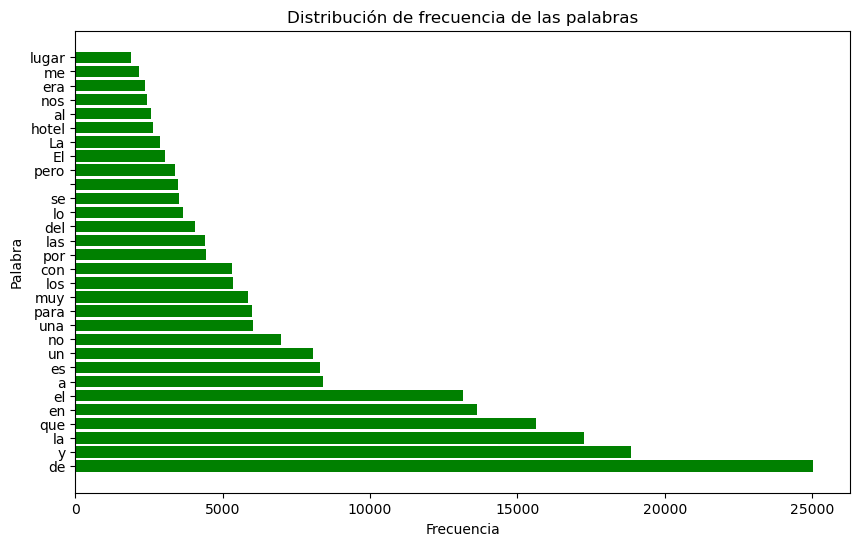

In [959]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

Vemos las palabras menos frecuentes en el siguiente gráfico

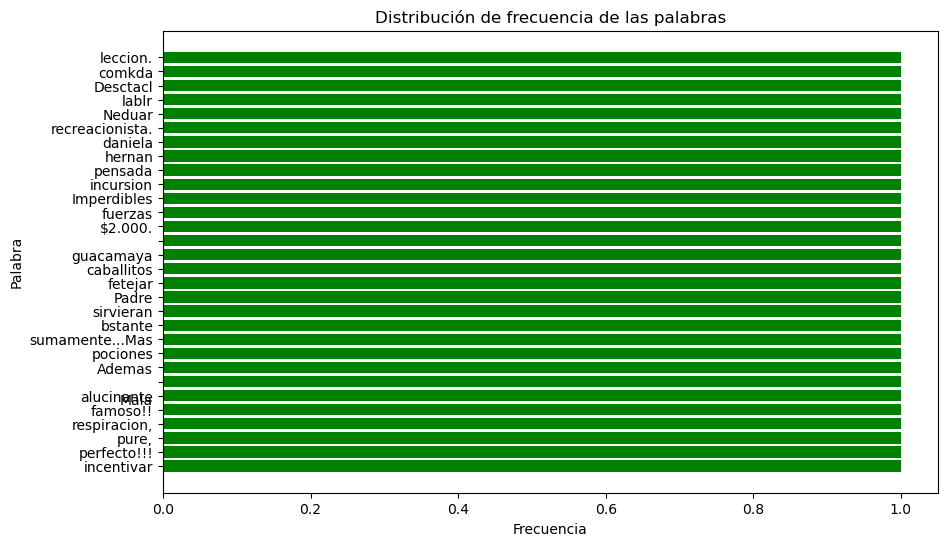

In [960]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [961]:
textos

,Review,Class,Conteo,Max,Min,len
0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,252
1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,297
2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,104
3,Abusados con la factura de alimentos siempre s...,3,422,14,1,422
4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,419
...,...,...,...,...,...,...
7870,"Me parece buen sistema, agiliza el transporte,...",4,113,11,2,113
7871,"Fue una escapada de un día desde el complejo, ...",4,261,12,2,261
7872,La Plaza de la Revolución es un lugar emblemát...,3,777,14,1,777
7873,Es la segunda ocasión que me quedo en los cuar...,1,651,12,0,651


<Axes: xlabel='len', ylabel='Count'>

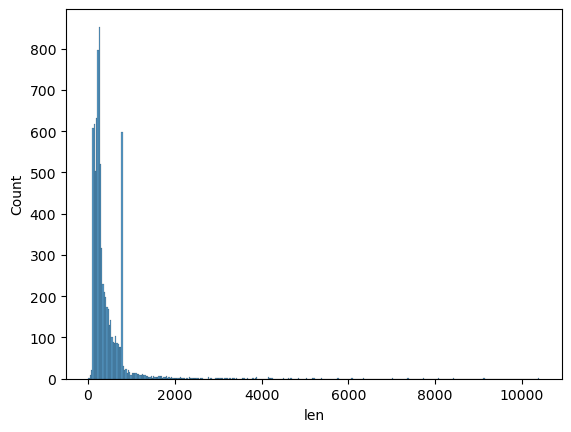

In [962]:
sns.histplot(textos['len'])

<Axes: xlabel='len', ylabel='Count'>

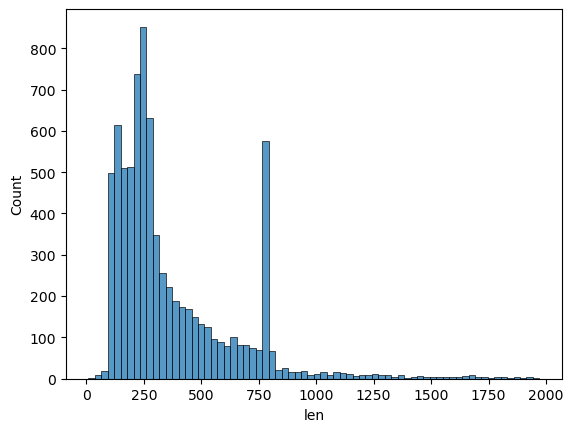

In [963]:
sns.histplot(textos['len'].loc[textos['len']<2000])

<Axes: xlabel='Class', ylabel='Count'>

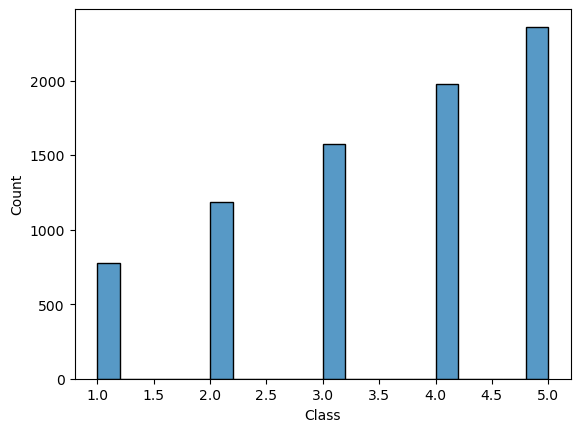

In [964]:
sns.histplot(textos['Class'])

In [965]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textos)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textos)'

#### 2.2 Preparación de los datos

##### 2.2.1 Limpieza de los datos

##### 2.2.1.1 Duplicados

In [966]:
textos.duplicated(keep = False).sum()

102

In [967]:
textos.drop_duplicates(keep='first', inplace=True)
textos.duplicated(keep = False).sum()

0

##### 2.2.1.2 Eliminación de números
Se hace uso de expresiones regulares con el objetivo de eliminar los diferentes formates de números que se pueden encontrar en el texto. 

In [968]:
#Quitar los números
print(textos['Review'][1201])
textos['Review'] = textos['Review'].replace(r'\d+,\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+', '', regex=True)
textos['Review'] = textos['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos['Review'][1201])

El día lunes 17 de setiembre 2012 visite con mi familia Monserratte y debía pagar un taxi, por lo que a las 12 M.D, fui a la taquilla para cambiar 50,000 pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los 50,000 al empleado en la taquilla y me estafó, me dió un billete de 20,000 encima y debajo venia uno de 2,000 y luego el otro de 1,000.  El funcionario de la taquilla me estafó con el cambio y se dejó 27,000 pesos. Es bueno que sepan que tienen un ladrón trabajando en sus instalaciones y así como fui estafado yo, me imagino que también otros Turistas pasan por lo mismo. Revise muy bien su cambio en la ventanilla porque le pordría pasar lo mismo.
El día lunes  de setiembre  visite con mi familia Monserratte y debía pagar un taxi, por lo que a las  M.D, fui a la taquilla para cambiar  pesos y poder pagar mi taxi. Mi sorpresa al pagar el taxi fue que le entregue los  al empleado en la taquilla y me estafó, me dió un billete de  encima y debajo venia uno de 

Se definen rutinas de preprocesamiento que se recopilan en la rutina preprocessing() y softPreprocessing(), la segunda rutina se aplica previo a la aplicación de lemmatización con el fin de obtener mejores resultados y tras lemmatizar si se aplica preprocessing()

In [969]:
spanish_stopwords = stopwords.words('spanish')
print(spanish_stopwords)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
          new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
          new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_words.append(word.lower())
    return new_words
    

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        if word is not None:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
    return new_words

#def replace_numbers(words):
#    """Replace all interger occurrences in list of tokenized words with textual representation"""
#    p = inflect.engine()
#    print(words)
#    new_words = []
#    for word in words:
#        if word.isdigit():
#            new_word = p.number_to_words(word)
#            new_words.append(new_word)
#            print("if " + new_word)
#        else:
#            new_words.append(word)
#    return new_words

def remove_stopwords(words):
    own = ['ser','haber','tener','ir','poder','hacer','hotel','pedir','llegar','mas','habitacion','habitación',
           'decir','lugar','dia','alguno','dar','querer','comida','ver','vista','despue',
           'un','dos','tres','cuatro','cuc','adema']
    new_words = []
    for word in words:
        if word not in spanish_stopwords and word not in own:
            new_words.append(word)
    return new_words

def preprocessing(words):
    words = to_lowercase(words)
 #   words = replace_numbers(words)
    words = remove_punctuation(words)
#    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

def getString(list): 
    string = ""
    for w in list: 
        string += w + " "
    return string



def softPreprocessing(words):
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    getString(words)
    return getString(words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

##### 2.2.1.3 SoftPreprocessing
Aplicación de softpreprocessing para poder ejecutar el lemmatizer(), en esto lo único que se hace es dejar todas las palabras en minusculas y eliminar caracteres no ascii para que lemmatizer de Stanza no se confunda

In [970]:
textos['tokens'] = [i.split(' ') for i in textos['Review']]
textos['tokens'] = textos['tokens'].apply(softPreprocessing)#Se aplica un preprocesamiento muy tranqui

textos.iloc[1201]['tokens']

'lugar especial para un atardecer o para conocer como son los cubanos y cubanas, autentico y romantico. inicio y fin de muchas cosas: el amor, la aventura, la ciudad y el mar. '

##### 2.2.2 Lemmatizer - Normalización
Se aplica un lemmatizer que transforma el texto en su lema (sujeto + verbo + predicado), esto permite por un lado reducir las palabras relevantes similares y por otro lado se obtiene una mejor puntuación respecto a no aplicarlo. Esta prueba de que daba mejor se explica mejor en el documento. 

Cabe resaltar que el Lemmatizer se demora ejecuntado un aproximado de 1h 20 min por esa razón se comenta y se guarda ese archivo en el csv lemaSoftProcessing.csv para posteriormente recuperarlo sin necesidad de ejeutarlo de nuevo. 


In [971]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización

#Codigo para guardar los lemas en csv
textos.to_csv('lemaSoftProcessing.csv')"""


"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos['tokens']= textos.apply(lemmatizer,axis=1) #Aplica la lematización\n\n#Codigo para guardar los lemas en csv\ntextos.to_csv('lemaSoftProcessing.csv')"

In [972]:

from ast import literal_eval
textosLemas = pd.read_csv('lemaSoftProcessing.csv', sep=',', encoding = 'utf-8')
textosLemas.iloc[1201]
textosLemas['tokens'] = textosLemas['tokens'].apply(literal_eval)
#print(textosLemas['tokens'][1201])
"""print(textos.iloc[1201]['tokens'])

print(textos.iloc[1201]['tokens'])"""
def getString(list): 

    string = ""
    for w in list: 
        
        string += w + " "
    #print(string)
    return string
textosLemas['tokens'] = textosLemas['tokens'].apply(getString)
print(textosLemas['tokens'])

0       mucho buen atencion y aclaracion de duda por p...
1       buen hotel si estar obligado a estar cerca de ...
2       ser uno lugar mucho lindo para fotografia , vi...
3       abusado con el factura de alimento siempre él ...
4       tener uno par de persona en el grupo que realm...
                              ...                        
7797    yo parecer buen sistema , agilizar el transpor...
7798    ser uno escapada de uno dia desde el complejo ...
7799    el plaza de el revolucion ser uno lugar emblem...
7800    ser el segundo ocasion que yo quedar en el cua...
7801    llegar por casualidad a el mercader , uno grup...
Name: tokens, Length: 7802, dtype: object


#### 2.2.3 Tokenización

Se utiliza WordPunctTokenizer dado que el idioma español no presenta contracciones y este Tokenizer es más robusto frente a los signos de puntuación. 

In [973]:

textosLemas['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textosLemas['tokens']]
    
textosLemas['tokens'].iloc[1201]

['lugar',
 'especial',
 'para',
 'uno',
 'atardecer',
 'o',
 'para',
 'conocer',
 'como',
 'ser',
 'el',
 'cubano',
 'y',
 'cubano',
 ',',
 'autentico',
 'y',
 'romantico',
 '.',
 'inicio',
 'y',
 'fin',
 'de',
 'mucho',
 'cosa',
 ':',
 'el',
 'amor',
 ',',
 'el',
 'aventura',
 ',',
 'el',
 'ciudad',
 'y',
 'el',
 'mar',
 '.']

In [974]:
textosLemas['tokens'].dropna()

0       [mucho, buen, atencion, y, aclaracion, de, dud...
1       [buen, hotel, si, estar, obligado, a, estar, c...
2       [ser, uno, lugar, mucho, lindo, para, fotograf...
3       [abusado, con, el, factura, de, alimento, siem...
4       [tener, uno, par, de, persona, en, el, grupo, ...
                              ...                        
7797    [yo, parecer, buen, sistema, ,, agilizar, el, ...
7798    [ser, uno, escapada, de, uno, dia, desde, el, ...
7799    [el, plaza, de, el, revolucion, ser, uno, luga...
7800    [ser, el, segundo, ocasion, que, yo, quedar, e...
7801    [llegar, por, casualidad, a, el, mercader, ,, ...
Name: tokens, Length: 7802, dtype: object

#### 2.2.4 Eliminación de ruido
Esta eliminación del ruido implica eliminar aquello asociado a mayusculas, eliminación de puntuación y de elementos NO ascii una vez se ha procesado el texto mediante Stanza. De igual manera uno de los pasos más fundamentales de eliminación de ruido implica eliminar las stop words que no sirven para el modelo 

In [975]:
textosLemas['tokens']=textosLemas['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,"[buen, atencion, aclaracion, duda, parte, seno..."
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,"[buen, si, obligado, cerca, centro, convención..."
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,"[lindo, fotografia, visitar, selina, musica, v..."
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,"[abusado, factura, alimento, siempre, echar, c..."
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,"[par, persona, grupo, realmente, comer, cabrit..."


In [976]:
textosLemas['tokens'] = textosLemas['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas.head()

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buen atencion aclaracion duda parte senorita v...
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen si obligado cerca centro convención resta...
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,lindo fotografia visitar selina musica vivo ce...
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusado factura alimento siempre echar culpa b...
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,par persona grupo realmente comer cabrito rest...


#### 2.2.5 Normalización

En este caso solo se presenta el stemming para demostrar que feu un paso que se implementó en el análisis sin embargo se prefiere dejar el lemmatizer ya que el alogritmo es mucho más robusto y no se pierde el significado de las palabras

In [977]:
"""stemmer = SnowballStemmer('spanish')

textos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]
i = 1201
print(textos['tokens'][i])
print(textos['Review'][i])"""

"stemmer = SnowballStemmer('spanish')\n\ntextos['tokens'] =  [ [stemmer.stem(word) for word in tokens] for tokens in textos['tokens']]\ni = 1201\nprint(textos['tokens'][i])\nprint(textos['Review'][i])"

In [978]:
def moda(texto):

    dict = {}
    for x in texto.split(' '):
    
        if x in dict.keys():
            dict[x] += 1
        else:
            dict[x] = 1

    max_key = max(dict, key=dict.get)
    return str(max_key)


textosLemas['moda'] = [moda(i) for i in textosLemas['tokens']]

In [979]:
textosLemas

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens,moda
0,0,Muy buena atención y aclaración de dudas por p...,5,252,20,0,buen atencion aclaracion duda parte senorita v...,buen
1,1,Buen hotel si están obligados a estar cerca de...,3,297,13,1,buen si obligado cerca centro convención resta...,buen
2,2,"Es un lugar muy lindo para fotografías, visite...",5,104,12,1,lindo fotografia visitar selina musica vivo ce...,lindo
3,3,Abusados con la factura de alimentos siempre s...,3,422,14,1,abusado factura alimento siempre echar culpa b...,factura
4,4,Tuvimos un par de personas en el grupo que rea...,3,419,14,1,par persona grupo realmente comer cabrito rest...,realmente
...,...,...,...,...,...,...,...,...
7797,7870,"Me parece buen sistema, agiliza el transporte,...",4,113,11,2,parecer buen sistema agilizar transporte conec...,parecer
7798,7871,"Fue una escapada de un día desde el complejo, ...",4,261,12,2,escapada complejo grupo turista guia informado...,escapada
7799,7872,La Plaza de la Revolución es un lugar emblemát...,3,777,14,1,plaza revolucion emblematico identificar haban...,alli
7800,7873,Es la segunda ocasión que me quedo en los cuar...,1,651,12,0,segundo ocasion quedar cuarto area jardin como...,cuarto


In [980]:
def frecuenciaPalabrasModa(palabras):
    frecuenciaPalabras = {}
    
    for p in palabras: 
        if p in frecuenciaPalabras.keys():
            frecuenciaPalabras[p] += 1
        else:
            frecuenciaPalabras[p] = 1
    print(frecuenciaPalabras)
    return frecuenciaPalabras


In [981]:
dictFrec = frecuenciaPalabrasModa(textosLemas['moda'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)

df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'buen': 541, 'lindo': 39, 'factura': 6, 'realmente': 19, 'complejo': 25, 'primero': 42, 'pues': 6, 'salir': 2, 'imposible': 3, 'despues': 16, 'habana': 87, 'equivocar': 1, 'acceso': 2, 'bastante': 30, 'cuba': 22, 'pm': 6, 'historia': 32, 'comer': 28, 'precioso': 10, 'solo': 58, 'esperar': 29, 'zona': 41, 'vivir': 4, 'excelente': 248, 'ok': 2, 'si': 221, 'preferido': 1, 'salida': 2, 'centro': 19, 'lamentablemente': 2, 'critica': 1, 'serio': 4, 'dejar': 22, 'naturaleza': 1, 'espectacular': 13, 'malo': 34, 'personal': 36, 'estrella': 16, 'traer': 2, 'comodo': 13, 'llevar': 16, 'mejor': 93, 'sucio': 23, 'cualquiera': 7, 'expectativa': 2, 'visitar': 56, 'edificio': 27, 'servicio': 147, 'alli': 22, 'bonito': 63, 'piramide': 2, 'siglo': 3, 'visita': 38, 'ciudad': 83, 'cerro': 6, 'amigo': 8, 'viaje': 31, 'nunca': 11, 'restaurante': 116, 'pagar': 14, 'varios': 10, 'basura': 5, 'familia': 24, 'bogota': 10, 'platillo': 7, 'restaurant': 5, 'escondido': 1, 'atento': 2, 'gran': 54, 'duda': 18, 'sit

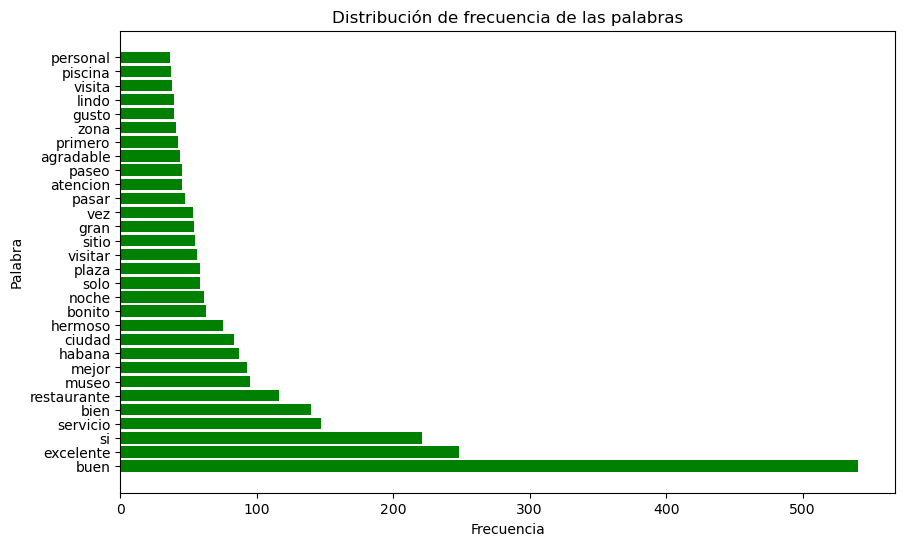

In [982]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)



fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

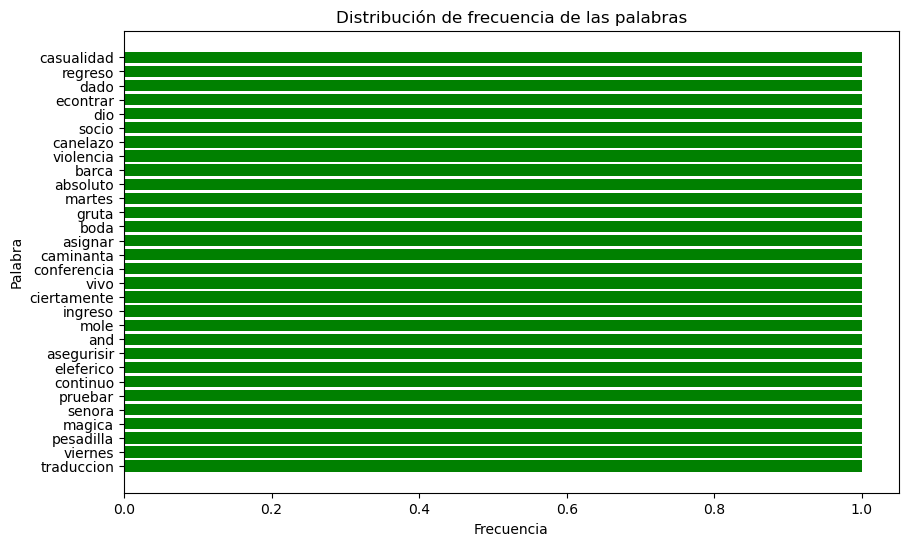

In [983]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [984]:
#Codigo para guardar los lemas en csv
textosLemas.to_csv('resultadoProcesamiento.csv')
textosLemasSolos = textosLemas[['tokens','Class']]
textosLemasSolos.to_csv('resultadoProcesamientoSoloTokens.csv')

### 3. División en conjuntos train y test y validación
Se divide el conjunto de datos en train y test. El train se subdivide en  train y validation (val). 

In [985]:

x_train, x_test = train_test_split(textosLemas, test_size=0.45, random_state=1) 
print(x_train.shape, x_test.shape)
x_train_completo = x_train
x_train, x_val = train_test_split(x_train, test_size=0.25, random_state=1)

print( x_test.shape,x_train.shape, x_val.shape)


(4291, 8) (3511, 8)
(3511, 8) (3218, 8) (1073, 8)


#### 3.1 Segundo profile tras aplicación de preprocessing

In [986]:
x_train

,Unnamed: 0,Review,Class,Conteo,Max,Min,tokens,moda
7272,7343,"Los ascensores no funcionan, las habitaciones...",1,260,12,0,ascensor funcionar plaga insecto cucaracha tam...,ascensor
3675,3697,Pertenece al conjunto de plazas de La Habana q...,4,257,13,0,pertenecer conjunto plaza habana perder mientr...,habana
2258,2268,Merece la pena ir a visitarlo aunque el viaje ...,5,230,14,0,merecer pena visitar aunque viaje largo recome...,visitar
4459,4488,Tuvimos un brunch la carta con muy buena comid...,5,188,11,1,brunch carta buen servicio abundante cafe si p...,si
1092,1094,"Estuve días en el hotel, tener en cuenta que ...",4,242,10,0,cuenta encontrar alejado casco historico desay...,cuenta
...,...,...,...,...,...,...,...,...
5325,5368,Los tiquetes para subir en teleférico son dema...,2,409,14,1,tiquete subir teleferico demasiado caro arriba...,caro
6093,6145,"Comida mala, sin sabor, pedí el platillo mixto...",1,176,9,0,malo sabor platillo mixto cantidad q cabrito c...,malo
4684,4716,Antes de iniciar mi viaje estube leeiendo sobr...,3,375,12,0,iniciar viaje estubir leer comentario buen ahi...,viaje
7648,7721,No deja de sorprender en el estado de abandono...,2,298,13,0,dejar sorprender abandono encontrar joya desor...,dejar


<Axes: xlabel='len', ylabel='Count'>

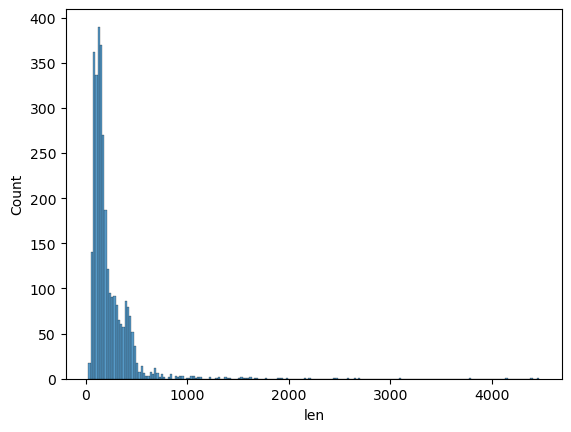

In [987]:
x_train['len']=[len(i)  for i in x_train['tokens']]

sns.histplot(x_train['len'])

<Axes: xlabel='lenOriginal', ylabel='Count'>

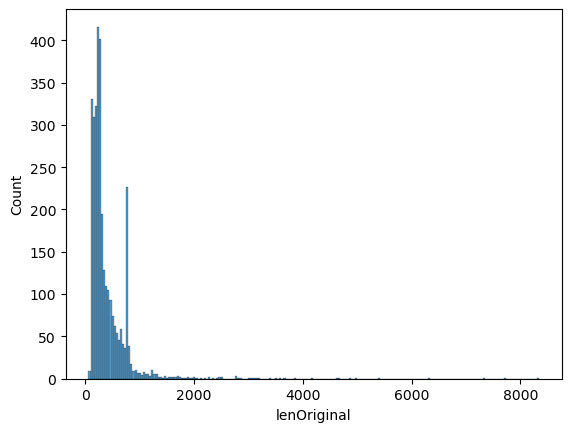

In [988]:
x_train['lenOriginal']=[len(i)  for i in x_train['Review']]
sns.histplot(x_train['lenOriginal'])

<Axes: xlabel='Class', ylabel='Count'>

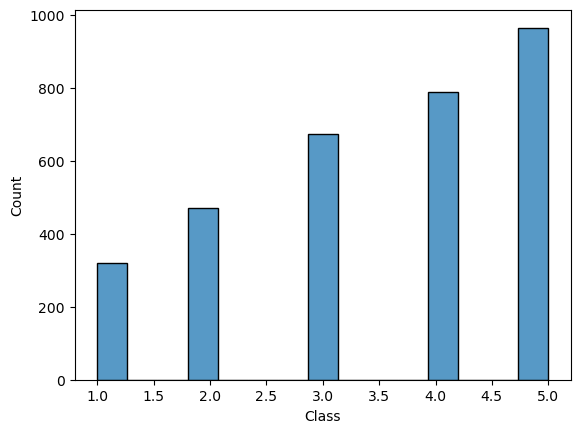

In [989]:
sns.histplot(x_train['Class'])

In [990]:
"""import ydata_profiling
from ydata_profiling import ProfileReport
ProfileReport(textosLemas)"""

'import ydata_profiling\nfrom ydata_profiling import ProfileReport\nProfileReport(textosLemas)'

In [991]:

dictFrecuenciasTokenizado = frecuenciaPalabras(textosLemas['tokens'])

df_Frecuencias = pd.DataFrame.from_dict(dictFrecuenciasTokenizado, orient='index', columns=['frecuencia'])

df_Frecuencias['palabra'] = df_Frecuencias.index
df_Frecuencias.reset_index(drop=True,inplace=True)


df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]

{'buen': 3514, 'atencion': 869, 'aclaracion': 2, 'duda': 363, 'parte': 632, 'senorita': 32, 'veronico': 1, 'castillo': 125, 'atento': 316, 'amable': 597, 'cuestion': 33, 'laborable': 1, 'ideal': 98, 'descansar': 108, 'limpieza': 263, 'ordenado': 37, 'restaurante': 1586, 'variedad': 225, 'si': 2437, 'obligado': 154, 'cerca': 411, 'centro': 494, 'convención': 13, 'necesitar': 287, 'mejorar': 175, 'frio': 143, 'cafe': 264, 'flojo': 13, 'monton': 251, 'pan': 66, 'persona': 736, 'servir': 270, 'uderstanding': 1, 'bu': 1, 'significar': 41, 'servicio': 2204, 'barrio': 66, 'opción': 187, 'deber': 700, 'especial': 274, 'lindo': 298, 'fotografia': 65, 'visitar': 920, 'selina': 2, 'musica': 338, 'vivo': 118, 'cerveza': 92, 'artesanal': 21, 'abusado': 1, 'factura': 79, 'alimento': 195, 'siempre': 537, 'echar': 39, 'culpa': 12, 'buscar': 199, 'rfc': 1, 'proporcionar': 60, 'independisar': 1, 'base': 38, 'registrado': 7, 'check': 153, 'in': 113, 'pasar': 856, 'aun': 250, 'nadade': 1, 'aunque': 536, '

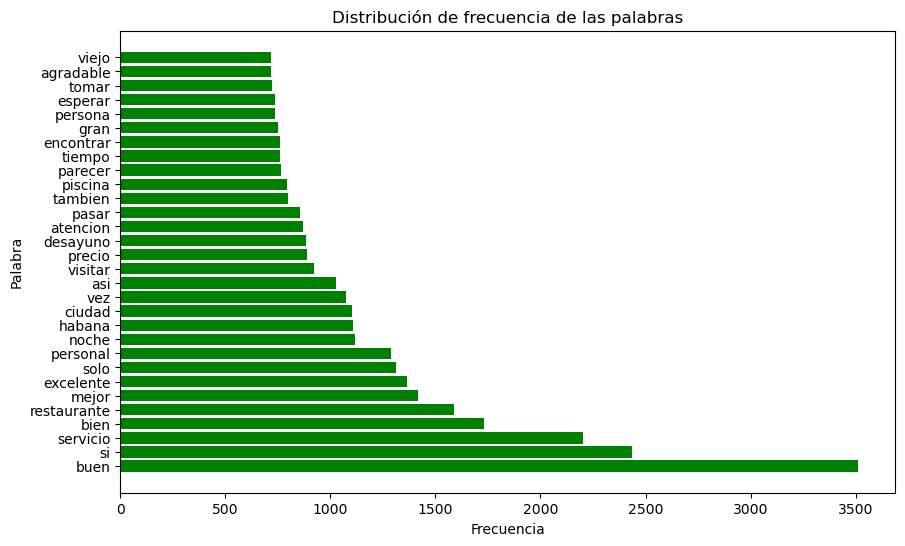

In [992]:
sortedFirst = df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).head(30)

fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst['palabra'], sortedFirst['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

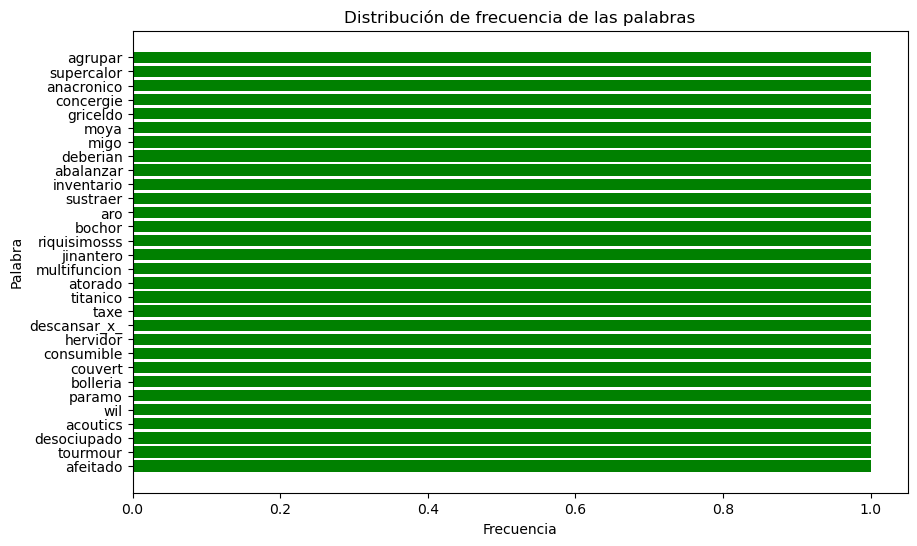

In [993]:
sortedLast= df_Frecuencias.copy().sort_values(by=['frecuencia'], ascending=False).tail(30)

fig2 = plt.figure(figsize=(10, 6))
plt.barh(sortedLast['palabra'], sortedLast['frecuencia'], color='green')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

#### 3.2 Columna target y texto

In [994]:
x_train_completo, y_train_completo = x_train_completo['tokens'],x_train_completo['Class']
x_train, y_train = x_train['tokens'],x_train['Class']
x_val, y_val = x_val['tokens'],x_val['Class']
x_test, y_test = x_test['tokens'],x_test['Class']

In [995]:
x_train_completo

4425    encanto par desayunar domingo familia agradabl...
5261    alojar unidad b semana edificio planta bonito ...
1960    realmente restaurante sorprender entrar varios...
2027    viejo instalación deteriorado requerir manteni...
6658    buen tarde alojar ano encanto regreso lamentab...
                              ...                        
905     alojar noche alli pared fino escuchar cada mov...
5192    level impecable amplio magnifico visto servici...
3980    parecer fiesta inn finsa mantenimiento decar s...
235     visitar encanto calidad servicio comodo excele...
5157    impresionante solo comprar tiempo show luz pm ...
Name: tokens, Length: 4291, dtype: object

## 4. Embedding del texto
Transformación del texto en formato para la máquina

#### 4.1 Count Vectorizer
Utilización del conteo de palabras presentes como Vectorizer -> No creo que sea tan bueno

In [996]:
count = CountVectorizer()
x_train_complete_countVectorizer = count.fit_transform(x_train_completo)
print(x_train_complete_countVectorizer.shape)
x_train_complete_countVectorizer.toarray()[3]

x_train_countVectorizer = count.transform(x_train)
print(x_train_countVectorizer.shape)
x_train_countVectorizer.toarray()[3]


x_val_countVectorizer = count.transform(x_val)
print(x_val_countVectorizer.shape)
x_val_countVectorizer.toarray()[3]


x_test_countVectorizer = count.transform(x_test)
print(x_test_countVectorizer.shape)
x_test_countVectorizer.toarray()[3]

(4291, 11419)
(3218, 11419)
(1073, 11419)
(3511, 11419)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### 4.2 TfiDf

In [997]:
tfidf = TfidfVectorizer()
x_train_completo_tfidfVectorizer = tfidf.fit_transform(x_train_completo)
print(x_train_completo_tfidfVectorizer.shape)
x_train_completo_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_completo_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))



x_train_tfidfVectorizer = tfidf.transform(x_train)
print(x_train_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_train = pd.DataFrame(x_train_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_train = df_train.sort_values('TF-IDF', ascending=False)
#print(df_train.head(20))

x_test_tfidfVectorizer = tfidf.transform(x_test)
print(x_test_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

df_test = pd.DataFrame(x_test_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_test = df_test.sort_values('TF-IDF', ascending=False)
#print(df_test.head(20))

x_val_tfidfVectorizer = tfidf.transform(x_val)
print(x_val_tfidfVectorizer.shape)
x_train_tfidfVectorizer.toarray()[3]

#print(x_val_tfidfVectorizer[0].T)

df_val = pd.DataFrame(x_val_tfidfVectorizer[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df_val = df_val.sort_values('TF-IDF', ascending=False)
#print(df_val.head(20))




(4291, 11419)
(3218, 11419)
(3511, 11419)
(1073, 11419)


### 5. Construcción de los modelos

#### 5.1 Naive bayes


In [998]:
from sklearn.naive_bayes import MultinomialNB

# Build a Gaussian Classifier
model = MultinomialNB()

# Model training
model.fit(x_train_complete_countVectorizer, y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer)

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [4 5 5 ... 5 4 5]


In [999]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.47
Recall: 0.41522736357143997
Precisión: 0.464902918578737
Puntuación F1: 0.4231455678677033


In [1000]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(x_train_complete_countVectorizer.toarray(), y_train_completo)

# Predict Output
y_pred_test_completo = model.predict(x_test_countVectorizer.toarray())

print("Actual Value:", y_test)
print("Predicted Value:", y_pred_test_completo)

Actual Value: 1953    4
4576    5
2217    4
5386    4
4141    4
       ..
1903    4
3780    3
3867    4
7509    5
1524    5
Name: Class, Length: 3511, dtype: int64
Predicted Value: [2 3 2 ... 3 4 4]


In [1001]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.27
Recall: 0.28061670264103333
Precisión: 0.2840976725938909
Puntuación F1: 0.26341935734009714


#### 5.2 Support vector machines - Ana Sofía Castellanos


Inicialmente se implementa el algoritmo con algunos hiperparámetros aleatorios, para tener una idea preliminar del rendimiento

In [1002]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from time import time
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel='linear')
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Training time: 3.800109s; Prediction time: 3.143446s
Class 1:  {'precision': 0.4956140350877193, 'recall': 0.3373134328358209, 'f1-score': 0.40142095914742454, 'support': 335.0}
Class 2:  {'precision': 0.38444924406047515, 'recall': 0.3333333333333333, 'f1-score': 0.35707121364092276, 'support': 534.0}
Class 3:  {'precision': 0.38317757009345793, 'recall': 0.42330383480825956, 'f1-score': 0.4022424667133847, 'support': 678.0}
Class 4:  {'precision': 0.4062877871825877, 'recall': 0.3788049605411499, 'f1-score': 0.3920653442240374, 'support': 887.0}
Class 5:  {'precision': 0.5908360128617364, 'recall': 0.6824512534818942, 'f1-score': 0.6333476949590694, 'support': 1077.0}


[[113 126  55  18  23]
 [ 86 178 165  66  39]
 [ 20 119 287 156  96]
 [  4  32 164 336 351]
 [  5   8  78 251 735]]


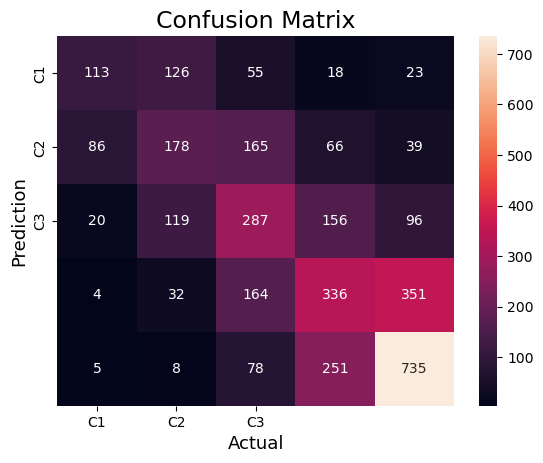

In [1003]:
# Matriz de confusión
cm = confusion_matrix(y_test,prediction_linear)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['C1', 'C2', 'C3'],
            yticklabels=['C1', 'C2', 'C3'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [1004]:
print('Exactitud: %.2f' % accuracy_score(y_test, prediction_linear))
print("Recall: {}".format(recall_score(y_test,prediction_linear, average="macro")))
print("Precisión: {}".format(precision_score(y_test,prediction_linear, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,prediction_linear, average="macro")))

Exactitud: 0.47
Recall: 0.4310413630000916
Precisión: 0.4520729298571952
Puntuación F1: 0.4372295357369678


##### 5.2.1 Búsqueda de hiperparámetros


In [1005]:
#Espacio de busqueda
param_grid = {'C': [0.1,1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001,0.0001], 
              'kernel': ['rbf','linear','poly','sigmoid']}  

##### Dummy grid search
A partir del conjunto de datos de validación se buscan los hipérparametros. Los resultados de esta búsqueda no son para nada buenos ya que se obtienen conmo mejores parametros: [c = 1, g = 1, kernel = 'poly'] y como se observa esto lleva a tener clase 1 y 2 sin precision, ya que no los clasifica. Se comenta el código ya que demora unos 30min en ejecutar


In [1006]:
"""best_score= -1000
best_parameters = []
i = 0
for c in param_grid['C']: 
    for g in param_grid['gamma']:
        for k in param_grid['kernel']:
            param = [c,g,k]
            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)
            classifier = SVC(C=c, gamma=g, kernel=k)
            classifier.fit(x_val_tfidfVectorizer, y_val)
            score = classifier.score(x_val_tfidfVectorizer, y_val)
            if score> best_score: 
                best_score = score
                best_parameters = [c,g,k]
            print(1/64*i*100, '%'  )
            i+=1



print(best_score,best_parameters)"""

"best_score= -1000\nbest_parameters = []\ni = 0\nfor c in param_grid['C']: \n    for g in param_grid['gamma']:\n        for k in param_grid['kernel']:\n            param = [c,g,k]\n            #print('C: ', c, ' Gamma: ', g, ' Kernel: ', k)\n            classifier = SVC(C=c, gamma=g, kernel=k)\n            classifier.fit(x_val_tfidfVectorizer, y_val)\n            score = classifier.score(x_val_tfidfVectorizer, y_val)\n            if score> best_score: \n                best_score = score\n                best_parameters = [c,g,k]\n            print(1/64*i*100, '%'  )\n            i+=1\n\n\n\nprint(best_score,best_parameters)"

In [1007]:
best_parameters = 1,1,'poly'
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
# Perform classification with SVM, kernel=linear
classifier_linear = SVC(kernel=best_parameters[2],C=best_parameters[0],gamma=best_parameters[1])
t0 = time()
classifier_linear.fit(x_train_tfidfVectorizer, y_train)
t1 = time()
prediction_linear = classifier_linear.predict(x_test_tfidfVectorizer)
t2 = time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# results
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(y_test, prediction_linear, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])

Training time: 5.259292s; Prediction time: 3.321889s
Class 1:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 335.0}
Class 2:  {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 534.0}
Class 3:  {'precision': 0.5, 'recall': 0.0029498525073746312, 'f1-score': 0.005865102639296187, 'support': 678.0}
Class 4:  {'precision': 0.2857142857142857, 'recall': 0.002254791431792559, 'f1-score': 0.004474272930648769, 'support': 887.0}
Class 5:  {'precision': 0.30714285714285716, 'recall': 0.9981429897864438, 'f1-score': 0.46974000436967445, 'support': 1077.0}


c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ascas\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1008]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.27
Recall: 0.28061670264103333
Precisión: 0.2840976725938909
Puntuación F1: 0.26341935734009714


##### K-fold grid search
Dado que el dummy search da pésimos resultados se opta por hacer un k-fold para encontrar los hiperparámetros óptimos. De aquí se encuentra que el mejor parámetro tiene los hiperparámetros: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}. Se deja comentado ya que demora 1h aproximadamente. 


In [1009]:
from sklearn.model_selection import KFold 
particiones = KFold(n_splits=3,shuffle=True,random_state=0)

In [1010]:
svm = SVC()
best_model = GridSearchCV(svm, param_grid, cv=particiones,verbose = 3)

In [1011]:
"""# Ajuste del modelo
best_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)
#El grid search se demora 80 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros"""

'# Ajuste del modelo\nbest_model.fit(x_train_completo_tfidfVectorizer, y_train_completo)\n#El grid search se demora 80 min -> Por este motivo se deja comentado de aqui se sacaron los mejores parametros'

In [1012]:
"""best_model.best_params_"""

'best_model.best_params_'

In [1013]:
"""svm_final = best_model.best_estimator_"""

'svm_final = best_model.best_estimator_'

In [1014]:

svm_final = SVC(C=10,gamma=1,kernel='rbf')
# results
y_pred_train_completo =svm_final.fit(x_train_completo_tfidfVectorizer, y_train_completo)

y_pred_test_completo = svm_final.predict(x_test_tfidfVectorizer)

report = classification_report(y_test, y_pred_test_completo, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])


Class 1:  {'precision': 0.5617977528089888, 'recall': 0.29850746268656714, 'f1-score': 0.38986354775828463, 'support': 335.0}
Class 2:  {'precision': 0.3757828810020877, 'recall': 0.33707865168539325, 'f1-score': 0.35538005923000987, 'support': 534.0}
Class 3:  {'precision': 0.36904761904761907, 'recall': 0.41150442477876104, 'f1-score': 0.3891213389121339, 'support': 678.0}
Class 4:  {'precision': 0.4191343963553531, 'recall': 0.41488162344983087, 'f1-score': 0.4169971671388102, 'support': 887.0}
Class 5:  {'precision': 0.6024590163934426, 'recall': 0.6824512534818942, 'f1-score': 0.6399651719634306, 'support': 1077.0}


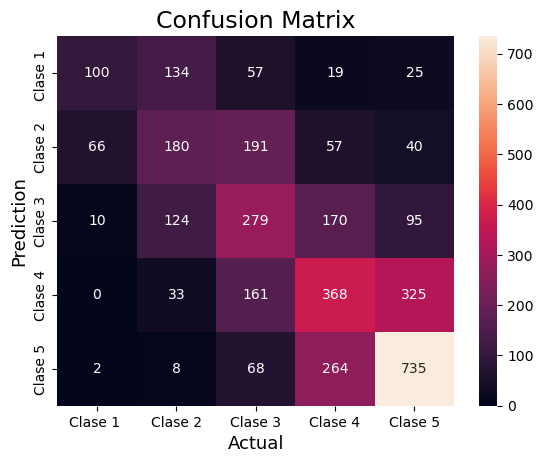

In [1015]:
cm = confusion_matrix(y_test, y_pred_test_completo)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Clase 1 ', 'Clase 2', 'Clase 3','Clase 4', 'Clase 5'],
            yticklabels=['Clase 1 ', 'Clase 2', 'Clase 3','Clase 4', 'Clase 5'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [1016]:
print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.47
Recall: 0.4288846832164893
Precisión: 0.4656443331214983
Puntuación F1: 0.4382654570005339


### 6. El mejor modelo

#### 6.1 Obtencion de features

In [1017]:
svm_final = SVC(C=10,gamma=1,kernel='rbf')
# results
y_pred_train_completo =svm_final.fit(x_train_completo_tfidfVectorizer, y_train_completo)

y_pred_test_completo =  svm_final.predict(x_test_tfidfVectorizer)
print(y_pred_test_completo)




[4 5 5 ... 4 4 5]


In [1018]:
x_test = x_test.to_frame(name="tokens")
x_test['ClassBestModel'] =y_pred_test_completo
x_test

,tokens,ClassBestModel
1953,hermoso arreglar malecon caminar tranquilament...,4
4576,hermoso legado epoca colonial pintoresco hermo...,5
2217,visitar costo disfrutar hermoso ciudad foto sa...,5
5386,alto camino empinado lindo iglesia espectacula...,4
4141,bonito terraza agradable mitad paseo montejo p...,4
...,...,...
1903,buen opcion visitar calidez bonito duda volver...,5
3780,varios vez trave excursión autobus caminar lar...,4
3867,bien diagramado buen explicación buen material...,4
7509,increiblemente conservar ceremosnia canonazo p...,4


In [1019]:
report = classification_report(y_test, y_pred_test_completo, output_dict=True)
print('Class 1: ', report['1'])
print('Class 2: ', report['2'])
print('Class 3: ', report['3'])
print('Class 4: ', report['4'])
print('Class 5: ', report['5'])

Class 1:  {'precision': 0.5617977528089888, 'recall': 0.29850746268656714, 'f1-score': 0.38986354775828463, 'support': 335.0}
Class 2:  {'precision': 0.3757828810020877, 'recall': 0.33707865168539325, 'f1-score': 0.35538005923000987, 'support': 534.0}
Class 3:  {'precision': 0.36904761904761907, 'recall': 0.41150442477876104, 'f1-score': 0.3891213389121339, 'support': 678.0}
Class 4:  {'precision': 0.4191343963553531, 'recall': 0.41488162344983087, 'f1-score': 0.4169971671388102, 'support': 887.0}
Class 5:  {'precision': 0.6024590163934426, 'recall': 0.6824512534818942, 'f1-score': 0.6399651719634306, 'support': 1077.0}


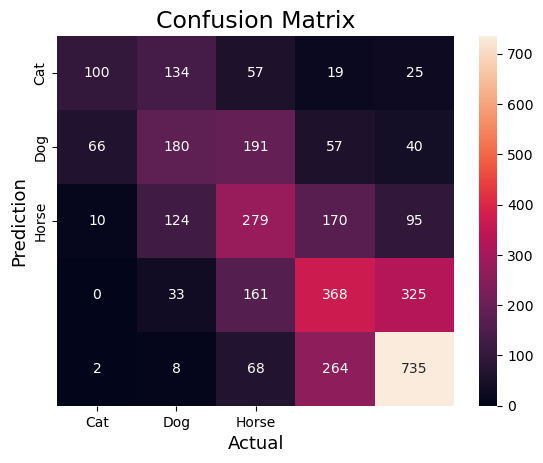

In [1020]:
cm = confusion_matrix(y_test, y_pred_test_completo)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Cat', 'Dog', 'Horse'],
            yticklabels=['Cat', 'Dog', 'Horse'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

In [1021]:

print('Exactitud: %.2f' % accuracy_score(y_test, y_pred_test_completo))
print("Recall: {}".format(recall_score(y_test,y_pred_test_completo, average="macro")))
print("Precisión: {}".format(precision_score(y_test,y_pred_test_completo, average="macro")))
print("Puntuación F1: {}".format(f1_score(y_test,y_pred_test_completo, average="macro")))

Exactitud: 0.47
Recall: 0.4288846832164893
Precisión: 0.4656443331214983
Puntuación F1: 0.4382654570005339


In [1022]:
"""from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm_final, pd.DataFrame.sparse.from_spmatrix(x_test_tfidfVectorizer), y_test)

feature_names = tfidf.get_feature_names_out()
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")"""

'from sklearn.inspection import permutation_importance\n\nperm_importance = permutation_importance(svm_final, pd.DataFrame.sparse.from_spmatrix(x_test_tfidfVectorizer), y_test)\n\nfeature_names = tfidf.get_feature_names_out()\nfeatures = np.array(feature_names)\n\nsorted_idx = perm_importance.importances_mean.argsort()\nplt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])\nplt.xlabel("Permutation Importance")'

Obtencion de palabras frecuentes por cada grupo


In [1023]:
x_test

,tokens,ClassBestModel
1953,hermoso arreglar malecon caminar tranquilament...,4
4576,hermoso legado epoca colonial pintoresco hermo...,5
2217,visitar costo disfrutar hermoso ciudad foto sa...,5
5386,alto camino empinado lindo iglesia espectacula...,4
4141,bonito terraza agradable mitad paseo montejo p...,4
...,...,...
1903,buen opcion visitar calidez bonito duda volver...,5
3780,varios vez trave excursión autobus caminar lar...,4
3867,bien diagramado buen explicación buen material...,4
7509,increiblemente conservar ceremosnia canonazo p...,4


In [1024]:
class1_test = x_test.loc[x_test['ClassBestModel']==1]
class2_test = x_test.loc[x_test['ClassBestModel']==2]
class3_test = x_test.loc[x_test['ClassBestModel']==3]
class4_test = x_test.loc[x_test['ClassBestModel']==4]
class5_test = x_test.loc[x_test['ClassBestModel']==5]

In [1025]:
print(class1_test.shape,class2_test.shape,class3_test.shape,class4_test.shape,class5_test.shape)

(178, 2) (479, 2) (756, 2) (878, 2) (1220, 2)


In [1026]:
#Max tiene el máximo tamaño de la palabra
class1_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class1_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
class1_test['len'] = [len(i)  for i in class1_test['tokens']]
class1_test['moda'] = [moda(i) for i in class1_test['tokens']]


class2_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class2_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class2_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class2_test['tokens']]
class2_test['len'] = [len(i)  for i in class2_test['tokens']]
class2_test['moda'] = [moda(i) for i in class2_test['tokens']]


class3_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class3_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class3_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class3_test['tokens']]
class3_test['len'] = [len(i)  for i in class3_test['tokens']]
class3_test['moda'] = [moda(i) for i in class3_test['tokens']]

class4_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class4_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class4_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class4_test['tokens']]
class4_test['len'] = [len(i)  for i in class4_test['tokens']]
class4_test['moda'] = [moda(i) for i in class4_test['tokens']]

class5_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class5_test['tokens']]
#Max tiene el minimo tamaño de la palabra
class5_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class5_test['tokens']]
class5_test['len'] = [len(i)  for i in class5_test['tokens']]
class5_test['moda'] = [moda(i) for i in class5_test['tokens']]




C:\Users\ascas\AppData\Local\Temp\ipykernel_46224\3738526227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1_test['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
C:\Users\ascas\AppData\Local\Temp\ipykernel_46224\3738526227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class1_test['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in class1_test['tokens']]
C:\Users\ascas\AppData\Local\Temp\ipykernel_46224\3738526227.py:5: SettingWithCopyWarning: 
A va

In [1027]:
def getFrecuenciesGroup(textos,size): 
    dictFrec = frecuenciaPalabras(textos['tokens'])

    df_Frecuencias = pd.DataFrame.from_dict(dictFrec, orient='index', columns=['frecuencia'])

    df_Frecuencias['palabra'] = df_Frecuencias.index
    df_Frecuencias.reset_index(drop=True,inplace=True)
    print(df_Frecuencias)

    #df_Frecuencias['palabra']=[unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore') for word in df_Frecuencias['palabra']]
    #print(df_Frecuencias)

    return df_Frecuencias

In [1028]:
size = 20
dfFrecuencias1 = getFrecuenciesGroup(class1_test,size)
sortedFirst1, sortedLast1 = dfFrecuencias1.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias1.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)
print(sortedFirst1)
dfFrecuencias2 = getFrecuenciesGroup(class2_test,size)
sortedFirst2, sortedLast2 = dfFrecuencias2.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias2.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

dfFrecuencias3= getFrecuenciesGroup(class3_test,size)
sortedFirst3, sortedLast3 = dfFrecuencias3.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias3.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

dfFrecuencias4 = getFrecuenciesGroup(class4_test,size)
sortedFirst4, sortedLast4 = dfFrecuencias4.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias4.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

dfFrecuencias5 = getFrecuenciesGroup(class5_test,size)
sortedFirst5, sortedLast5 = dfFrecuencias5.copy().sort_values(by=['frecuencia'], ascending=False).head(size),dfFrecuencias5.copy().sort_values(by=['frecuencia'], ascending=False).tail(size)

#print(sortedFirst1.sort_values(by=['frecuencia'], ascending=False))

{'horrible': 23, 'estadia': 5, 'atencion': 20, 'persona': 30, 'limpieza': 13, 'tocar': 5, 'cucaracha': 10, 'nido': 1, 'cama': 16, 'asco': 3, 'nunca': 49, 'pasar': 32, 'limpiar': 10, 'tampoco': 7, 'buen': 28, 'suerte': 1, 'quedar': 22, 'jama': 12, 'volver': 29, 'plato': 24, 'chilaquil': 2, 'llevar': 23, 'frio': 10, 'aguacate': 1, 'tradicional': 3, 'pan': 2, 'blanco': 2, 'acompanar': 3, 'parecer': 17, 'piedra': 2, 'costo': 3, 'rico': 5, 'general': 13, 'servicio': 80, 'malo': 44, 'ofrecer': 16, 'promoción': 1, 'final': 4, 'respetar': 8, 'cobrar': 25, 'entrar': 12, 'tomar': 14, 'canelazo': 6, 'salir': 14, 'dirijir': 1, 'caja': 6, 'pagar': 32, 'supuesto': 5, 'entregar': 6, 'cuenta': 11, 'exuberante': 1, 'cover': 9, 'ooo': 1, 'peso': 7, 'cada': 14, 'ma': 31, 'habana': 17, 'inmejorable': 1, 'situacion': 6, 'recorrer': 1, 'viejo': 22, 'paseo': 2, 'mayoria': 5, 'cosa': 13, 'inter': 2, 'cerca': 8, 'ano': 21, 'creer': 4, 'reformar': 1, 'simple': 3, 'instalación': 10, 'común': 1, 'super': 4, 'anti

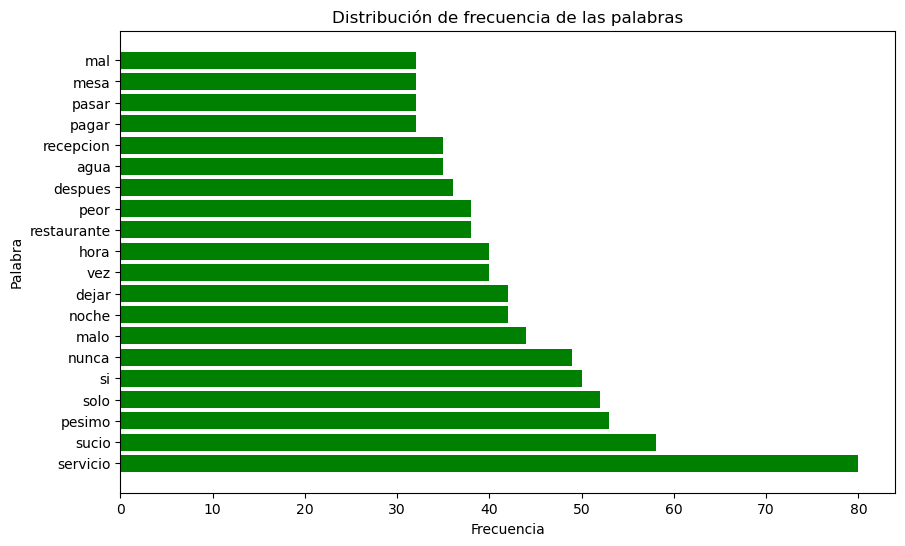

In [1029]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst1['palabra'], sortedFirst1['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

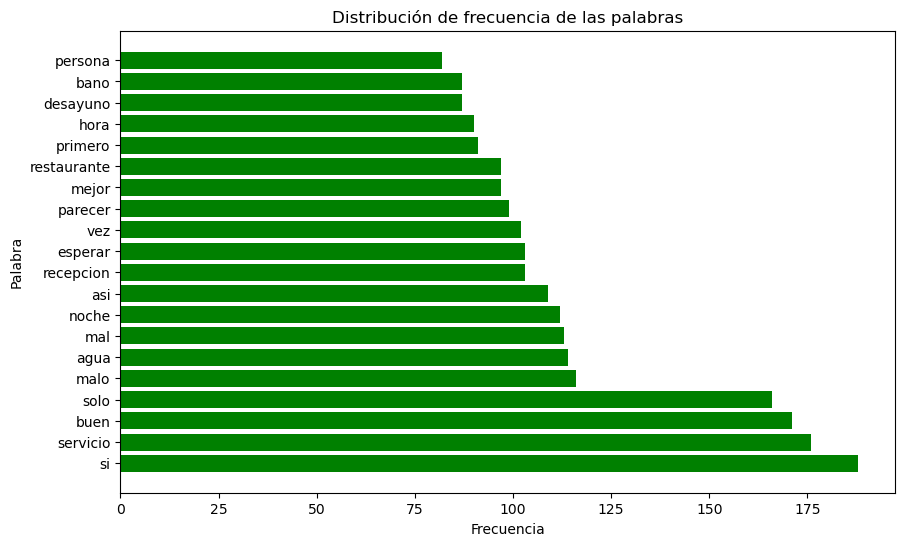

In [1030]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst2['palabra'], sortedFirst2['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()




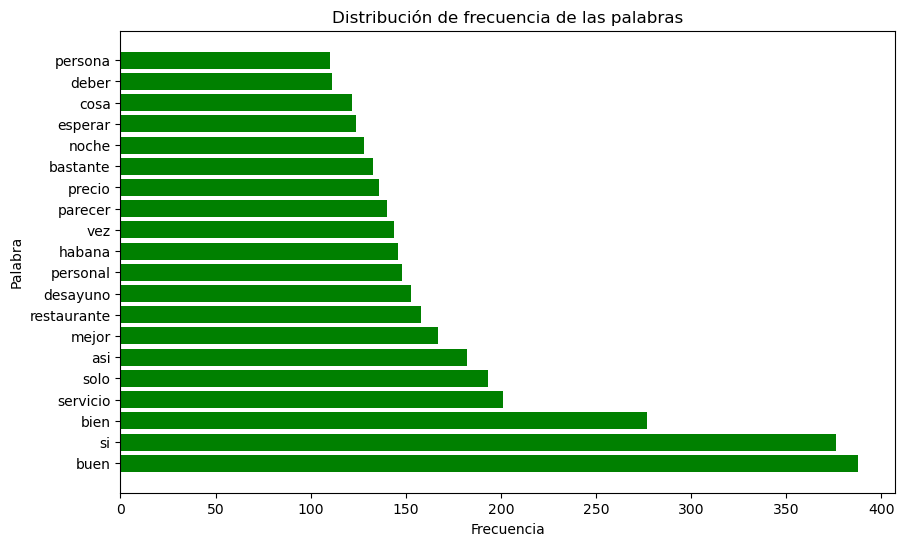

In [1031]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst3['palabra'], sortedFirst3['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

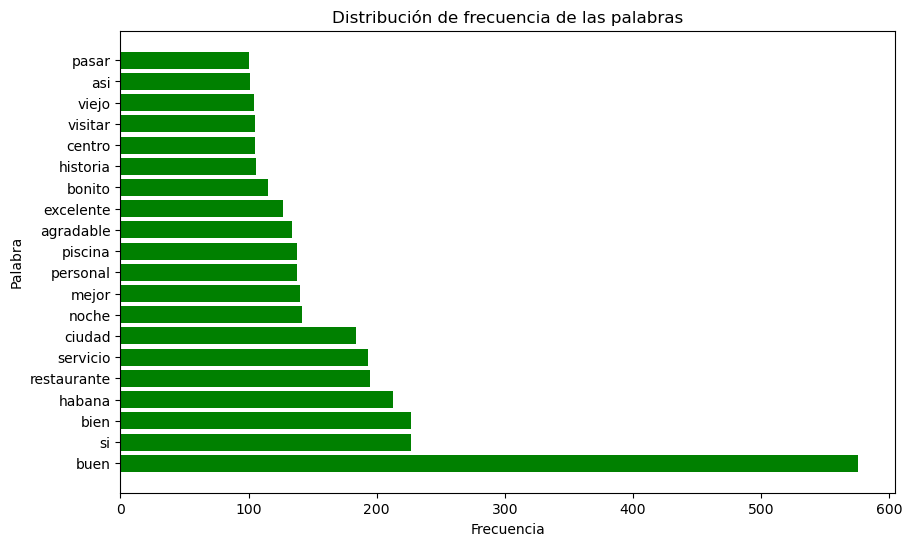

In [1032]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst4['palabra'], sortedFirst4['frecuencia'], color='green')



plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

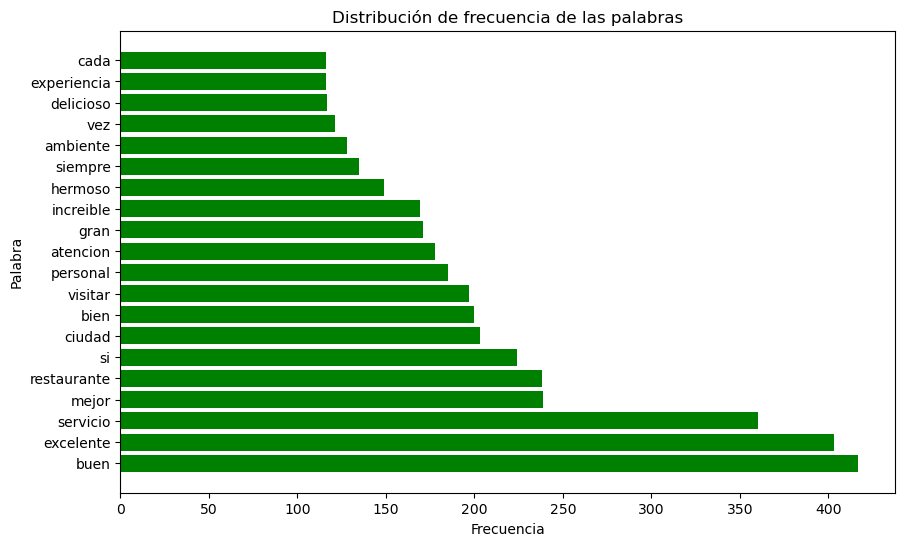

In [1033]:
fig = plt.figure(figsize=(10, 6))
plt.barh(sortedFirst5['palabra'], sortedFirst5['frecuencia'], color='green')

plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.title('Distribución de frecuencia de las palabras')
plt.show()

In [1059]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def getCompleteText(textos): 
    string = ""

    for e in textos['palabra']: 
        string+=e+ " "
    return string

texto1 = ' '.join(dfFrecuencias1['palabra'])
texto2 = ' '.join(dfFrecuencias2['palabra'])
texto3 = ' '.join(dfFrecuencias3['palabra'])
texto4 = ' '.join(dfFrecuencias4['palabra'])
texto5 = ' '.join(dfFrecuencias5['palabra'])
print(texto1)



horrible estadia atencion persona limpieza tocar cucaracha nido cama asco nunca pasar limpiar tampoco buen suerte quedar jama volver plato chilaquil llevar frio aguacate tradicional pan blanco acompanar parecer piedra costo rico general servicio malo ofrecer promoción final respetar cobrar entrar tomar canelazo salir dirijir caja pagar supuesto entregar cuenta exuberante cover ooo peso cada ma habana inmejorable situacion recorrer viejo paseo mayoria cosa inter cerca ano creer reformar simple instalación común super antiguo pasillo gotera poner cubo suelo toalla bajar agua caer varios molestar cambiar vaciar simplemente arreglar ventana romper mueble antiquisimo tambien roto incomodo dormir bien bano todavio sucio estancia pesimo visitar primero mil carta casi levantar despues minuto pedido botella tomado mo recomendar caducado mal peor cadena motivo calidad sumo importancia asunto solucionar problema dejar perder cliente detalle nadie recibir escalera subir ayudar maleta rampa burro p

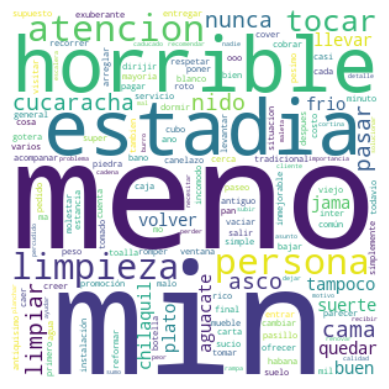

In [1060]:
wc = WordCloud(background_color = "white")
wc.generate(texto1)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


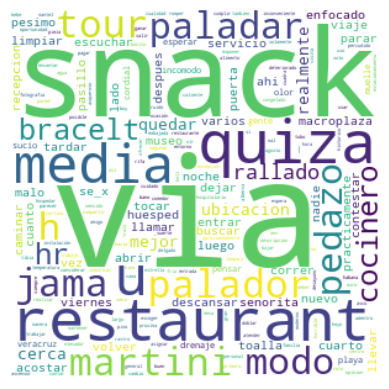

In [1061]:
wc = WordCloud(background_color = "white")
wc.generate(texto2)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


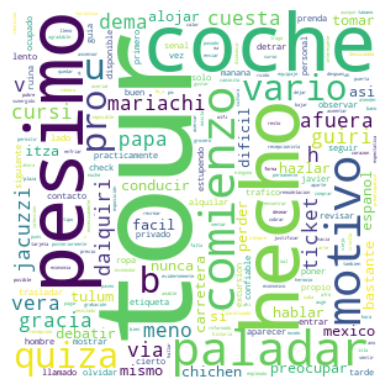

In [1062]:
wc = WordCloud(background_color = "white")
wc.generate(texto3)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


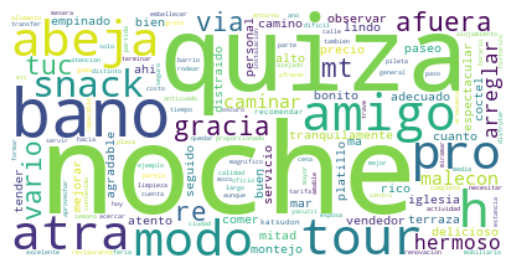

In [1065]:
wc = WordCloud(background_color = "white")
wc.generate(texto4)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


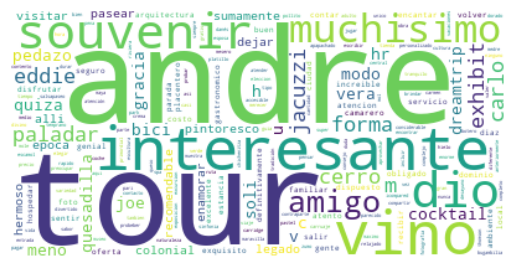

In [1066]:
wc = WordCloud( background_color = "white")
wc.generate(texto5)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")


#### 6.1 Guardar resultados en un csv

Aplicar transformaciones a la prediccion

In [1040]:
# Uso de la libreria pandas para la lectura de archivos
data_test=pd.read_csv('particion_prueba_estudiantes.csv', sep=',', encoding = 'utf-8')
# Asignación a una nueva variable de los datos leidos

In [1041]:
data_test

,Review
0,La primera noche nos encontramos en la habitac...
1,A una calle de catedral con platillos tradicio...
2,Porciones muy miserables\nAgua con sabor a clo...
3,Cartagena encanta. De todas las ciudades colon...
4,Ibamos con mucha ilusion de disfrutar el espec...
...,...
1745,Subir en funicular y bajar en teleferico fue u...
1746,"La gente espera el lugar central en La Habana,..."
1747,Todo excelente con el hotel: las albercas para...
1748,Nos detuvimos en un bocado antes de la puesta ...


In [1042]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1750 non-null   object
dtypes: object(1)
memory usage: 13.8+ KB


In [1043]:
textos_test = data_test.copy()


Duplicados

In [1044]:
textos_test.duplicated(keep = False).sum()

10

In [1045]:
textos_test.drop_duplicates(keep='first', inplace=True)
textos_test.duplicated(keep = False).sum()

0

Eliminacion de numeros

In [1046]:
#Quitar los números

textos_test['Review'] = textos_test['Review'].replace(r'\d+,\d+', '', regex=True)
textos_test['Review'] = textos_test['Review'].replace(r'\d+', '', regex=True)
textos_test['Review'] = textos_test['Review'].replace(r'\d+.\d+', '', regex=True)
print(textos_test['Review'][0])

La primera noche nos encontramos en la habitación con un nido () de cucarachas muertas y la alfombra muy sucia...que por cierto nunca limpiaron hasta que reclamamos.  La cena de fin de año fue un bufete que acabó en un tremendo desorden por el excesivo número de mesas vendidas, no se podía caminar para ir a servirte la comida, para luego encontrarte con bandejas vacías,  mi esposa y yo y otra pareja "NO CENAMOS" porque nos encontramos con puras bandejas vacías!!...pagamos $ pesos por por pareja por nada!!!  El servicio del restaurante pesimo, pesimo,pesimo....se tardaron muchísimo tiempo en atendernos, nos trajeron el desayuno en partes, nunca nos dieron el café que pedimos desde que llegamos....un pésimo servicio  El frigobar vacío y después de reclamar lo surtieron pero_x_


Soft preprocessing

In [1047]:
textos_test['tokens'] = [i.split(' ') for i in textos_test['Review']]
textos_test['tokens'] = textos_test['tokens'].apply(softPreprocessing)#Se aplica un preprocesamiento muy tranqui

textos_test.iloc[1201]['tokens']

'este hotel fue en su momento un icono en la habana pero ahora mismo necesita bastantes reformas. en primer lugar solo funcionaba un ascensor por lo que bajar y subir era una odisea. varias puertas de acceso al hotel no abren, asi como el echo de que en recepcion no hay aire acondicionado. las habitaciones sencillas, pero la moqueta necesita cambiarse al igual que las ventanas. como opinion positiva el personal, tanto de recepcion como los porteros y la ubicacion frente al malecon.espero que ahora que lo ha cogido la cadena iberostar le devuelva el explendor que tuvo hace anos. '

In [1048]:
"""def lemmatizer(row):

    review= row['tokens']
    
    print(row.name)
    doc  =  nlp(review)
    #print (review)
    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]
    finalLemma =[]
    for sent in lemma:
        for word in sent:  
            finalLemma.append(word)
    #print(finalLemma)

    return finalLemma


textos_test['tokens']= textos_test.apply(lemmatizer,axis=1) #Aplica la lematización

#Codigo para guardar los lemas en csv
textos_test.to_csv('lemaSoftProcessing_test.csv')
"""

"def lemmatizer(row):\n\n    review= row['tokens']\n    \n    print(row.name)\n    doc  =  nlp(review)\n    #print (review)\n    lemma = [[word.lemma for word in sent.words]  for sent in doc.sentences]\n    finalLemma =[]\n    for sent in lemma:\n        for word in sent:  \n            finalLemma.append(word)\n    #print(finalLemma)\n\n    return finalLemma\n\n\ntextos_test['tokens']= textos_test.apply(lemmatizer,axis=1) #Aplica la lematización\n\n#Codigo para guardar los lemas en csv\ntextos_test.to_csv('lemaSoftProcessing_test.csv')\n"

In [1049]:

from ast import literal_eval
textosLemas_test = pd.read_csv('lemaSoftProcessing_test.csv', sep=',', encoding = 'utf-8')
textosLemas_test.iloc[1201]
textosLemas_test['tokens'] = textosLemas_test['tokens'].apply(literal_eval)
#print(textosLemas['tokens'][1201])
"""print(textos.iloc[1201]['tokens'])

print(textos.iloc[1201]['tokens'])"""
def getString(list): 

    string = ""
    for w in list: 
        
        string += w + " "
    #print(string)
    return string
textosLemas_test['tokens'] = textosLemas_test['tokens'].apply(getString)
print(textosLemas_test['tokens'])

0       el primero noche yo encontrar en el habitacion...
1       a uno calle de catedral con platillo tradicion...
2       porción mucho miserable agua con sabor a cloro...
3       cartagena encantar . de todo el ciudad colonia...
4       ir con mucho ilusion de disfrutar el espectacu...
                              ...                        
1740    subir en funicular y bajar en teleferico ser u...
1741    el gente esperar el lugar central en el habana...
1742    todo excelente con el hotel : el alberca para ...
1743    yo detener en uno bocado antes de el puesta de...
1744    no tener agua , el mantenimiento uno desastre ...
Name: tokens, Length: 1745, dtype: object


In [1050]:

textosLemas_test['tokens'] = [ WordPunctTokenizer().tokenize(i) for i in textosLemas_test['tokens']]
    
textosLemas_test['tokens'].iloc[1201]

['este',
 'hotel',
 'ser',
 'en',
 'su',
 'momento',
 'uno',
 'icono',
 'en',
 'el',
 'habana',
 'pero',
 'ahora',
 'mismo',
 'necesitar',
 'bastante',
 'reforma',
 '.',
 'en',
 'primero',
 'lugar',
 'solo',
 'funcionar',
 'uno',
 'ascensor',
 'por',
 'él',
 'que',
 'bajar',
 'y',
 'subir',
 'ser',
 'uno',
 'odisea',
 '.',
 'varios',
 'puerta',
 'de',
 'acceso',
 'a',
 'el',
 'hotel',
 'no',
 'abrir',
 ',',
 'asi',
 'como',
 'el',
 'echo',
 'de',
 'que',
 'en',
 'recepcion',
 'no',
 'haber',
 'aire',
 'acondicionado',
 '.',
 'el',
 'habitación',
 'sencillo',
 ',',
 'pero',
 'el',
 'moqueta',
 'necesitar',
 'cambiar',
 'él',
 'a',
 'el',
 'igual',
 'que',
 'el',
 'ventana',
 '.',
 'como',
 'opinion',
 'positivo',
 'el',
 'personal',
 ',',
 'tanto',
 'de',
 'recepcion',
 'como',
 'el',
 'portero',
 'y',
 'el',
 'ubicacion',
 'frente',
 'a',
 'el',
 'malecon',
 '.',
 'esperar',
 'que',
 'ahora',
 'que',
 'él',
 'haber',
 'coger',
 'el',
 'cadena',
 'iberostar',
 'él',
 'devolver',
 'el',


In [1051]:
textosLemas_test['tokens'].dropna()

0       [el, primero, noche, yo, encontrar, en, el, ha...
1       [a, uno, calle, de, catedral, con, platillo, t...
2       [porción, mucho, miserable, agua, con, sabor, ...
3       [cartagena, encantar, ., de, todo, el, ciudad,...
4       [ir, con, mucho, ilusion, de, disfrutar, el, e...
                              ...                        
1740    [subir, en, funicular, y, bajar, en, teleferic...
1741    [el, gente, esperar, el, lugar, central, en, e...
1742    [todo, excelente, con, el, hotel, :, el, alber...
1743    [yo, detener, en, uno, bocado, antes, de, el, ...
1744    [no, tener, agua, ,, el, mantenimiento, uno, d...
Name: tokens, Length: 1745, dtype: object

Eliminacion ruido

In [1052]:
textosLemas_test['tokens']=textosLemas_test['tokens'].apply(preprocessing) #Aplica la eliminación del ruido

textosLemas_test.head()

,Review,tokens
0,La primera noche nos encontramos en la habitac...,"[primero, noche, encontrar, nido, cucaracha, m..."
1,A una calle de catedral con platillos tradicio...,"[calle, catedral, platillo, tradicional, tipo,..."
2,Porciones muy miserables\r\nAgua con sabor a c...,"[porción, miserable, agua, sabor, cloro, distr..."
3,Cartagena encanta. De todas las ciudades colon...,"[cartagena, encantar, ciudad, colonial, visita..."
4,Ibamos con mucha ilusion de disfrutar el espec...,"[ilusion, disfrutar, espectaculo, luz, sonido,..."


In [1053]:
textosLemas_test['tokens'] = textosLemas_test['tokens'].apply(lambda x: ' '.join(map(str, x)))
textosLemas_test.head()

,Review,tokens
0,La primera noche nos encontramos en la habitac...,primero noche encontrar nido cucaracha muerto ...
1,A una calle de catedral con platillos tradicio...,calle catedral platillo tradicional tipo gourm...
2,Porciones muy miserables\r\nAgua con sabor a c...,porción miserable agua sabor cloro distraido m...
3,Cartagena encanta. De todas las ciudades colon...,cartagena encantar ciudad colonial visitar lin...
4,Ibamos con mucha ilusion de disfrutar el espec...,ilusion disfrutar espectaculo luz sonido verda...


In [1054]:
x_test_anotar = textosLemas_test['tokens']


Tf-df

In [1055]:
x_test_anotar_tfidfVectorizer = tfidf.transform(x_test_anotar)
print(x_test_anotar_tfidfVectorizer.shape)
x_test_anotar_tfidfVectorizer.toarray()[3]

(1745, 11419)


array([0., 0., 0., ..., 0., 0., 0.])

Aplicando el mejor modelo

In [1056]:

y_pred_test_anotar =  svm_final.predict(x_test_anotar_tfidfVectorizer)
print(y_pred_test_anotar)

textosLemas_test['Class'] = y_pred_test_anotar


[1 5 5 ... 5 3 1]


In [1057]:
textosLemas_test


,Review,tokens,Class
0,La primera noche nos encontramos en la habitac...,primero noche encontrar nido cucaracha muerto ...,1
1,A una calle de catedral con platillos tradicio...,calle catedral platillo tradicional tipo gourm...,5
2,Porciones muy miserables\r\nAgua con sabor a c...,porción miserable agua sabor cloro distraido m...,5
3,Cartagena encanta. De todas las ciudades colon...,cartagena encantar ciudad colonial visitar lin...,4
4,Ibamos con mucha ilusion de disfrutar el espec...,ilusion disfrutar espectaculo luz sonido verda...,5
...,...,...,...
1740,Subir en funicular y bajar en teleferico fue u...,subir funicular bajar teleferico buen experien...,5
1741,"La gente espera el lugar central en La Habana,...",gente esperar central habana fiesta nacional d...,3
1742,Todo excelente con el hotel: las albercas para...,excelente alberca nino mejor atencion mesero p...,5
1743,Nos detuvimos en un bocado antes de la puesta ...,detener bocado puesta sol nadie restaurante pr...,3


In [1058]:

textosLemas_test.to_csv("Predicted.csv")

### 6. Recursos utilizados: 

https://medium.com/escueladeinteligenciaartificial/procesamiento-de-lenguaje-natural-stemming-y-lemmas-f5efd90dca8

https://neptune.ai/blog/vectorization-techniques-in-nlp-guide

https://gitlab.virtual.uniandes.edu.co/ISIS3301/practicas/blob/master/ProcesamientoTextos/Preparaci%C3%B3n_de_textos_estudiante.ipynb
